In [2]:
import pandas

data = pandas.read_csv('2019_nC0v_20200121_20200126 - SUMMARY.csv')

In [3]:
data[:]

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,NaN,NaN
1,Yunnan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
2,Beijing,Mainland China,1/21/2020,10.0,NaN,NaN,NaN
3,Taiwan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
4,Jilin,Mainland China,1/21/2020,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
363,NaN,France,1/26/2020 11:00 AM,3.0,NaN,NaN,NaN
364,NaN,Australia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN
365,NaN,Nepal,1/26/2020 11:00 AM,1.0,NaN,NaN,NaN
366,NaN,Malaysia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
Province/State       304 non-null object
Country              368 non-null object
Date last updated    368 non-null object
Confirmed            339 non-null float64
Suspected            88 non-null float64
Recovered            36 non-null float64
Deaths               24 non-null float64
dtypes: float64(4), object(3)
memory usage: 20.2+ KB


In [5]:
data['Recovered'].value_counts()

1.0     18
2.0     11
42.0     2
32.0     2
31.0     2
28.0     1
Name: Recovered, dtype: int64

In [7]:
data.describe()

,Confirmed,Suspected,Recovered,Deaths
count,339.000000,88.000000,36.000000,24.000000
mean,30.351032,22.613636,7.722222,11.041667
std,112.556169,48.177696,13.306521,17.521364
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,5.000000,4.000000,1.500000,1.000000
75%,18.000000,22.000000,2.000000,18.750000
max,1058.000000,244.000000,42.000000,52.000000


In [49]:
#Количество сметрей от коронавируса
import math
for i in range(len(data['Deaths'])):
    if math.isnan(data['Deaths'][i]) == False:
        print(str(data['Province/State'][i]) + '\t' + str(data['Deaths'][i]))
# array = []
# for i in range(len(data['Deaths'])):
#     if math.isnan(data['Deaths'][i]) == False and data['Deaths'][i] not in array:
#         array.append(data['Deaths'][i])
# print(array)
# data['Deaths'][array[1]]
# data['Deaths'][17]

Hebei	1.0
Hubei	17.0
Hubei	24.0
Heilongjiang	1.0
Hebei	1.0
Hubei	24.0
Heilongjiang	1.0
Hebei	1.0
Hubei	39.0
Heilongjiang	1.0
Hebei	1.0
Hubei	40.0
Heilongjiang	1.0
Hebei	1.0
Hubei	52.0
Henan	1.0
Shanghai	1.0
Fujian	1.0
Hebei	1.0
Hubei	52.0
Henan	1.0
Shanghai	1.0
Heilongjiang	1.0
Hebei	1.0


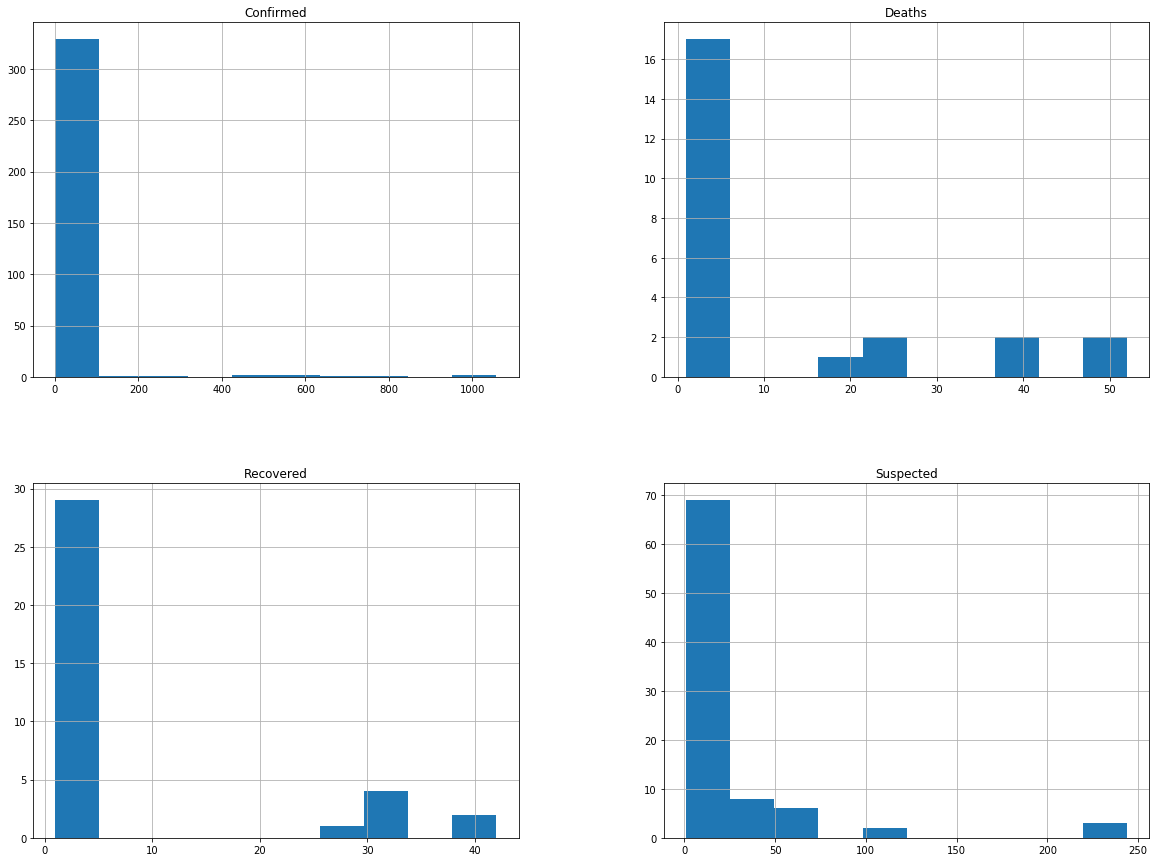

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(bins=10, figsize= (20, 15))
plt.show()

In [10]:
# Создание испытательного набора
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")
test_set.head()

294 train + 74 test


,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
165,Tianjin,Mainland China,1/24/2020 12:00 PM,8.0,NaN,NaN,NaN
33,Guangxi,Mainland China,1/22/2020 12:00,2.0,1.0,NaN,NaN
15,Hainan,Mainland China,1/21/2020,NaN,1.0,NaN,NaN
312,Illinois,US,1/25/2020 12:00 PM,1.0,NaN,NaN,NaN
57,Tibet,China,1/22/2020 12:00,NaN,NaN,NaN,NaN


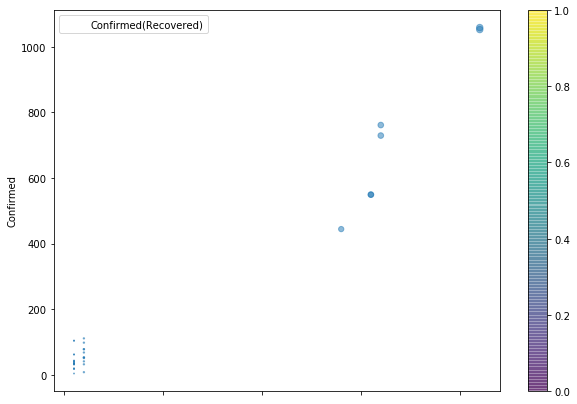

In [11]:
#s - радиус
# с - цвет
data.plot(kind="scatter", x="Recovered", y="Confirmed", alpha=0.5, s=data["Recovered"], 
          figsize=(10,7), cmap=plt.get_cmap("jet"), colorbar=True, label="Confirmed(Recovered)")

In [12]:
#Корреляция по коэффициенту корреляции Пирсона
corr_matrix = data.corr()

corr_matrix["Deaths"].sort_values(ascending=False)

Deaths       1.000000
Confirmed    0.994090
Recovered    0.919208
Suspected         NaN
Name: Deaths, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002415D81E470>,
      dtype=object)

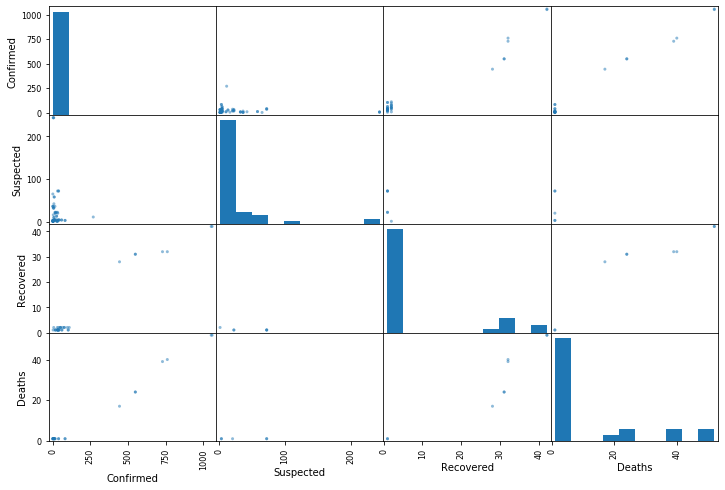

In [13]:
#Тоже корреляция - вычерчивает каждый числовой атрибут по отношению к каждому другому числовому атрибуту
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12,8))